## Tugas Besar 1 
### MK Visualisasi Data Gasal 2020/2021

<b>Nama<b>: Annisa Miranda <br> 
<b>NIM<b>: 1301184378

#### Aturan umum:
1. Setiap soal dievaluasi berdasarkan _code program_ dan penjelasan yang dibuat.
2. File _midterm project_ yang telah dikerjakan harus di-submit melalui LMS.
4. <b><font color='red'>Setiap tindakan plagiarism akan berakibat pada ketidaklulusan pada MK ini.</font><b>

### Kasus 1: Pima Indian Diabetes Data Set (Soal 1 - 2)
Dataset ini berasal dari the National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari pengumpulan dataset ini untuk dapat memprediksi secara diagnosis apakah seseorang mengidap penyakit diabetes atau tidak berdasarkan beberapa pengukuran diagnostik. Seluruh pasien pada dataset ini adalah perempuan keturunan India Pima yang berumur kurang dari 21 tahun.<br><br>
Dataset terdiri dari beberapa variabel prediktor medis dan satu variabel target sebagai _outcome_. Variabel prediktor di antaranya jumlah kehamilan, BMI, level insulin, usia, dll.lin level, age, and so on. Dataset dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/3i3gfr8pih4jwd4/diabetes.csv?dl=0)

### Soal 1 (15 poin)
Tampilkan visualisasi distribusi data untuk variabel "Glucose" dan "Insulin", lalu jelaskan hasil distribusinya.

#### Code

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


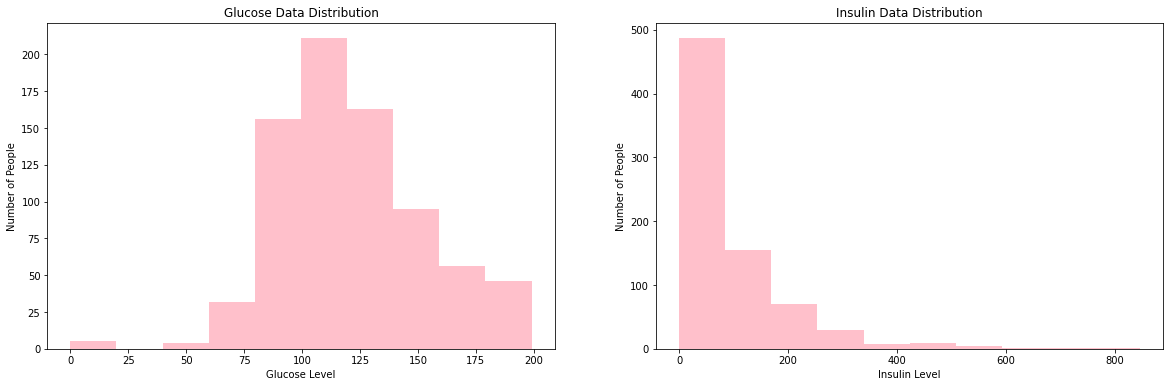

In [35]:
df_glu = df['Glucose']
df_in = df['Insulin']
fig = plt.figure()

x1 = fig.add_subplot(1, 2, 1)
x2 = fig.add_subplot(1, 2, 2)

#Glucose
df_glu.plot(kind='hist', color='pink', figsize=(20, 6), ax=x1)
x1.set_title('Glucose Data Distribution')
x1.set_xlabel('Glucose Level')
x1.set_ylabel('Number of People')

#Insulin
df_in.plot(kind='hist', color='pink', figsize=(20, 6), ax=x2)
x2.set_title('Insulin Data Distribution')
x2.set_xlabel('Insulin Level')
x2.set_ylabel('Number of People')

plt.show()

#### Penjelasan
Penyebaran pada data distribusi insulin tidak merata dengan jumlah antara 0 - 100 yaitu kurang lebih 400 orang, berbeda dengan glucose penyebaran data distribusi memiliki penyebaran yang relatif merata dengan tingkat antara 100 - 125 yaitu sekitar 200 orang


### Soal 2 (25 poin)
Tampilkan visualisasi dari korelasi (i) antar variabel dan (ii) antara variabel dan target, lalu jelaskan hasil korelasinya.

#### Code

Text(0.5, 1.0, 'Correlation Amongst Variables')

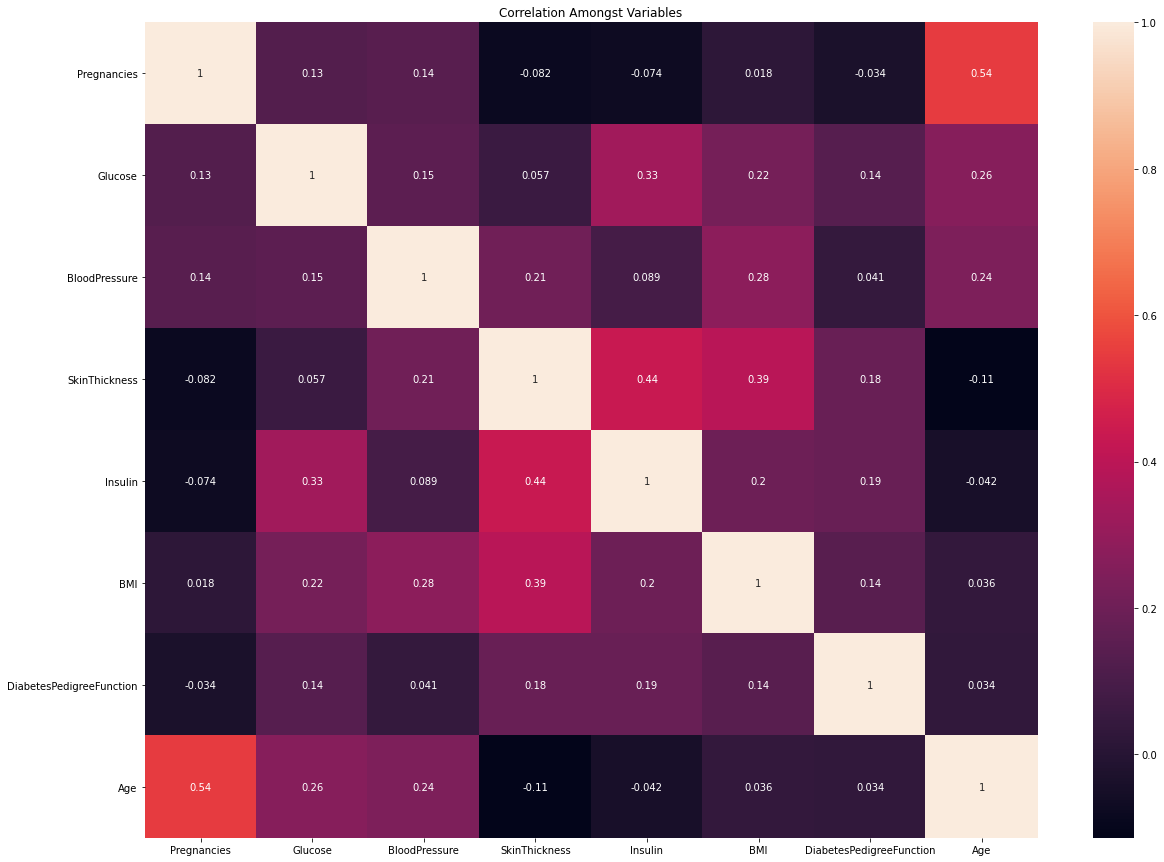

In [36]:
df_core = df.loc[:, 'Pregnancies' : 'Age']
corr = df_core.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.title('Correlation Amongst Variables')

Text(0.5, 1.0, 'Correlation Amongst Variables and Target')

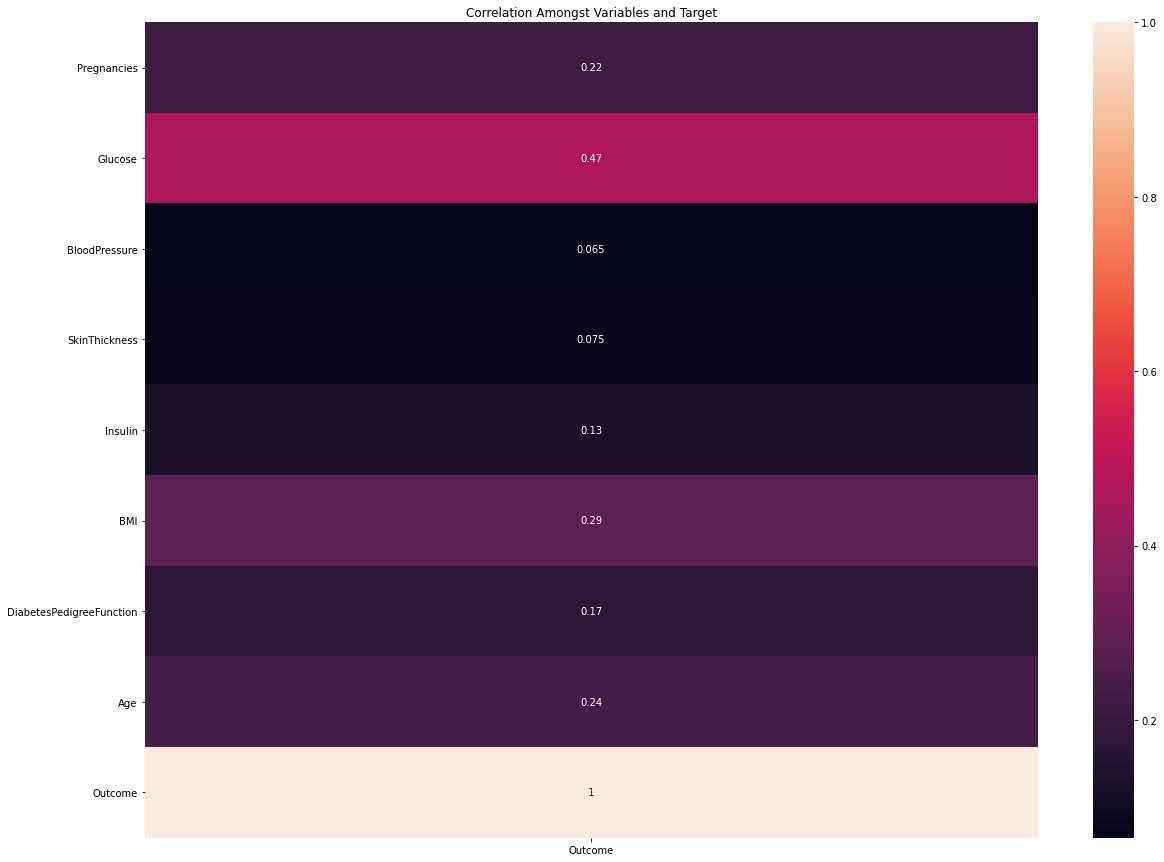

In [37]:
df_core = df.loc[:, 'Pregnancies' : 'Age']
corr = df.corr()[['Outcome']]

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.title('Correlation Amongst Variables and Target')

#### Penjelasan 
Semakin tinggi jumlah insulin, maka semakin tinggi peluang seseorang didiagnosis positif mengidap penyakit diabetes. Seseorang dengan kadar glukosa yang lebih tinggi diharapkan mengonsumsi lebih banyak insulin.

korelasi tertinggi pada korelasi antar variabel terjadi pada variabel yang sama, sementara korelasi terkecil terjadi pada SkinThickness dan Age.

korelasi tertinggi pada korelasi antar variabel dan target terjadi pada variabel yang sama pula, seperti outcome dan outcome yang memiliki korelasi 1. Sementara itu, korelasi terkecil terjadi pada BloodPressure dan Outcome dengan nilai 0.065.

### Kasus 2: Stock Market Analysis (Soal 3 - 4)
Pada kasus ini, kita akan membandingkan beberapa parameter yang diturunkan dari data historis harga saham dari 3 perusahaan, yaitu Nasdaq, Nikkei dan Hang Seng. Data set dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/0wny6x5sio9nvap/stock_market.zip?dl=0).

### Soal 3 (30 poin)
Lakukanlah _trend analysis_ nilai _daily percentage change_ dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan melalui visualisasi data.
_Trend analysis_ dilakukan dengan menggunakan hubungan berikut:
![output%2011.png](https://www.dl.dropboxusercontent.com/s/dxmrm74ksz5l9v2/trend_analysis_fig.png?dl=0)

#### Code

In [38]:
df_nas = pd.read_csv("Nasdaq.csv")
df_hang = pd.read_csv("Hang_Seng.csv")
df_nik = pd.read_csv("Nikkei.csv")

In [39]:
#function
def TrendAnalysis(x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No Change"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > -1 and x <= -0.5:
      return "Slight Negative"
  elif x > 1 and x <= 3:
      return "Positive"
  elif x > -3 and x <= -1:
      return "Negative"
  elif x > 3 and x <= 7:
      return "Among top gainers"
  elif x > -7 and x <= -3:
      return "Among top losers"
  elif x > 7:
      return "Bull run"
  elif x <= -7:
      return "Bear drop"

In [41]:
#Nasdaq Holdings
df_nas["Day_Perc_Change"] = df_nas["Adj Close"].pct_change()*100
df_nas.dropna(inplace = True, axis = 0)

df_nas["Trend Analysis"]= df_nas["Day_Perc_Change"].apply(lambda x:TrendAnalysis(x))

df_nas['Date'] = pd.to_datetime(df_nas['Date'])
df_nas_2019 = df_nas[df_nas['Date'].dt.year == 2019]

In [42]:
#Nikkei Holdings
df_nik["Day_Perc_Change"] = df_nik["Adj Close"].pct_change()*100
df_nik.dropna(inplace = True, axis = 0)

df_nik["Trend Analysis"]= df_nik["Day_Perc_Change"].apply(lambda x:TrendAnalysis(x))

df_nik['Date'] = pd.to_datetime(df_nik['Date'])
df_nik_2019 = df_nik[df_nik['Date'].dt.year == 2019]

In [40]:
#Hang seng Holdings
df_hang["Day_Perc_Change"] = df_hang["Adj Close"].pct_change()*100
df_hang.dropna(inplace = True, axis = 0)

df_hang["Trend Analysis"]= df_hang["Day_Perc_Change"].apply(lambda x:TrendAnalysis(x))

df_hang['Date'] = pd.to_datetime(df_hang['Date'])
df_hang_2019 = df_hang[df_hang['Date'].dt.year == 2019]

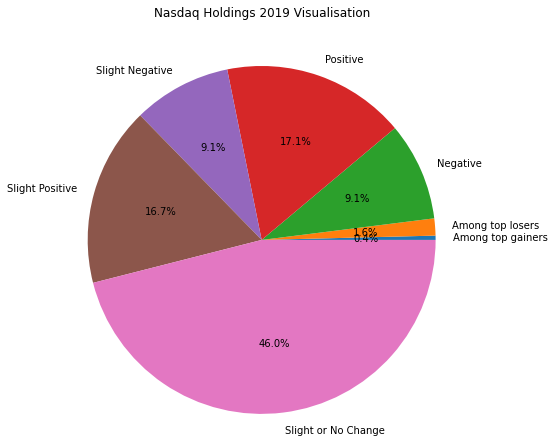

In [44]:
#Nasdaq Holdings 2019  Visualisation
df_nas_pie_data = df_nas_2019.groupby('Trend Analysis')
pie_label = sorted([i for i in df_nas_2019.loc[:, 'Trend Analysis'].unique()])
plt.pie(df_nas_pie_data['Trend Analysis'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)
plt.title('Nasdaq Holdings 2019 Visualisation', y = 1.5)
plt.show()

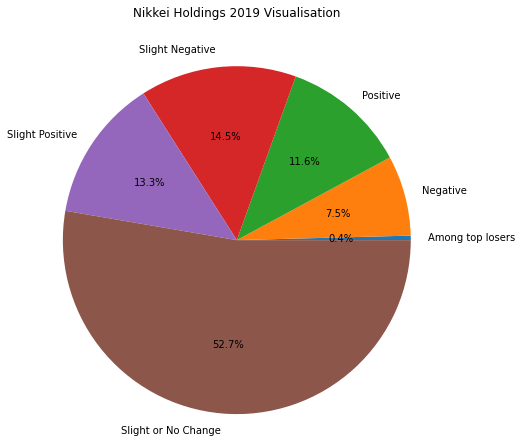

In [46]:
#Nikkei Holdings 2019 Visualisation
df_nik_pie_data = df_nik_2019.groupby('Trend Analysis')
pie_label = sorted([i for i in df_nik_2019.loc[:, 'Trend Analysis'].unique()])
plt.pie(df_nik_pie_data['Trend Analysis'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)
plt.title('Nikkei Holdings 2019 Visualisation', y = 1.5)
plt.show()

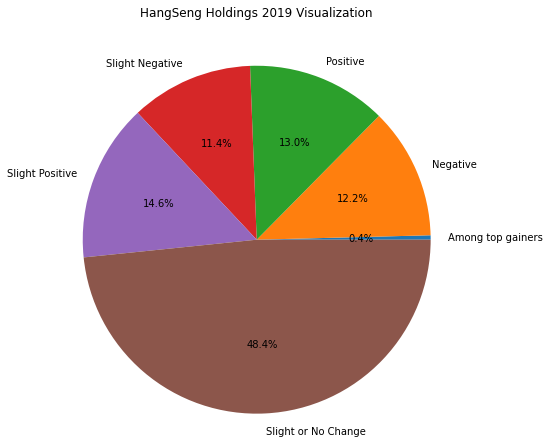

In [43]:
#Hang seng Holdings 2019 Visualisation
df_hang_pie_data = df_hang_2019.groupby('Trend Analysis')
pie_label = sorted([i for i in df_hang_2019.loc[:, 'Trend Analysis'].unique()])
plt.pie(df_hang_pie_data['Trend Analysis'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)
plt.title('HangSeng Holdings 2019 Visualization', y = 1.5)
plt.show()

#### Penjelasan 
Untuk Saham Nasdaq, trend tertinggi terjadi pada trend Slight or No Change yaitu sebesar 46.0%, diikuti dengan Positive sebesar 17.1%, lalu Slight Positive sebesar 16.7%, lalu Slight Negative dan Negative sama besar, yaitu sebesar 9.1%, lalu Among top losers yaitu sebesar 1.6% dan terendah Among top gainers sebesar 0.4%.

Untuk Saham Nikkei, trend tertinggi terjadi pada trend Slight or No Change yaitu sebesar 52.7%, diikuti dengan Slight Negative sebesar 14.5%, lalu Slight Positive sebesar 13.3%, lalu Positive sebesar 11.6%, lalu Negative sebesar 7.5% dan terendah Among top losers yaitu sebesar 0.4%.

Untuk Saham HangSeng, trend tertinggi terjadi pada trend Slight or No Change yaitu sebesar 48.4%, diikuti dengan Slight Positive sebesar 14.6%, lalu Positive sebesar 13.0%, lalu Negative sebesar 12.2%, lalu Slight Negative sebesar 11.4% dan terendah Among top gainers yaitu sebesar 0.4%. 


### Soal 4 (30 poin)
Lakukanlah analisis volatilitas dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan hasil visualisasinya.

Code

In [47]:
#Index Setting
df_nas_2019.set_index('Date', inplace=True)
df_nik_2019.set_index('Date', inplace=True)
df_hang_2019.set_index('Date', inplace=True)

Text(0, 0.5, 'Price')

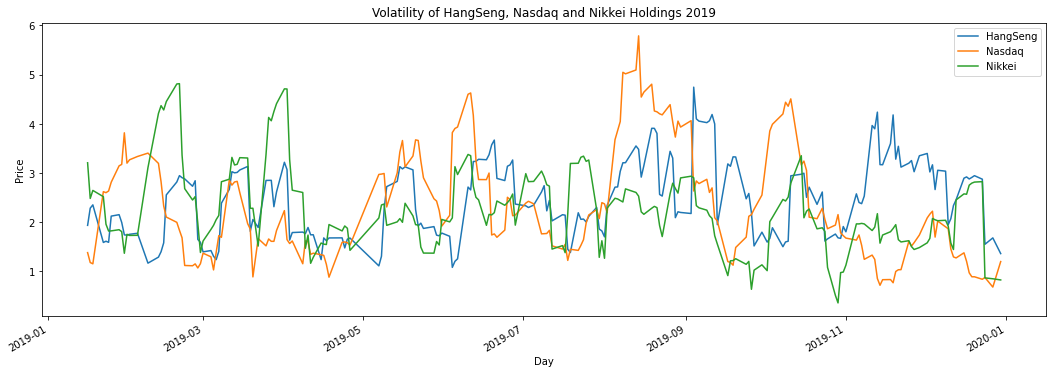

In [48]:
combined_df = pd.concat([df_hang_2019["Adj Close"], df_nas_2019["Adj Close"], df_nik_2019["Adj Close"]], axis=1)
combined_df.columns = ["HangSeng", "Nasdaq", "Nikkei"]

combined_df.dropna(inplace = True, axis = 0)

pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)

volatility = pct_chg_df[['HangSeng', 'Nasdaq', 'Nikkei']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (18, 6))
plt.title('Volatility of HangSeng, Nasdaq and Nikkei Holdings 2019')
plt.xlabel('Day')
plt.ylabel('Price')

#### Penjelasan 
Grafik volatilitas saham nasdaq, nikkei, dan hang seng selama 2019 hampir sama, dengan range harga trend slight or no change. Harga tertinggi pada saham nasdaq pada bulan 8 tahun 2019, serta harga terendah pada saham nikkei pada terjadi antara bulan 11 tahun 2019 dan ahkir bulan 10.